<a href="https://colab.research.google.com/github/DiaHere/U.S.-Cities-Parks-Recreation-Data/blob/main/Cluster_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

- Dataset: data about parks in 100 popular cities in the United Stataes. The data was derived from the Trust of Public Land and has been redunced by professor Jordan.
- Purpose: Create cluster analysis of those parks by first preparing the data, visualize it, then interpret it

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans


In [2]:
# Uploading the data
df = pd.read_csv('parks_data_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        100 non-null    object 
 1   Population                  100 non-null    float64
 2   Acres per 1,000 people      100 non-null    float64
 3   Parks per 10,000 residents  100 non-null    float64
 4   Parks as % City Area        100 non-null    float64
 5   Fields/ Diamonds            100 non-null    float64
 6   Tennis_dedicdated           100 non-null    float64
 7   Pickleball_dedicated        100 non-null    float64
 8   Pickleball_combined         100 non-null    float64
 9   Hoops                       100 non-null    float64
 10  Community_garden_sites      100 non-null    float64
 11  Dog_parks                   100 non-null    float64
 12  Playgrounds                 100 non-null    float64
 13  Rec_senior_centers          100 non-

In [3]:
df

,City,Population,"Acres per 1,000 people","Parks per 10,000 residents",Parks as % City Area,Fields/ Diamonds,Tennis_dedicdated,Pickleball_dedicated,Pickleball_combined,Hoops,Community_garden_sites,Dog_parks,Playgrounds,Rec_senior_centers,Restrooms,Skateparks,Splashpads,Swimming_pools,Disc_golf_courses,investment_dollars
0,"Albuquerque, NM",553345.0,38.905204,5.692651,0.189322,3.560166,3.397519,1.012027,2.891505,5.060134,0.000000,3.975820,3.307159,1.120458,1.301177,0.000000,0.903595,0.000000,0.000000,220.434307
1,"Anaheim, CA",345538.0,13.344408,1.881125,0.143306,2.604634,1.504900,1.447019,1.447019,1.504900,0.011576,1.157615,1.736423,0.289404,1.736423,2.604634,0.578808,0.000000,0.000000,76.151009
2,"Anchorage, AK",288464.0,3022.196184,7.765267,0.801559,3.154640,2.357313,0.693327,0.693327,1.975983,0.017333,2.773310,3.119973,0.207998,1.559987,1.733319,0.000000,1.733319,0.693327,68.927449
3,"Arlington, TX",397158.0,10.869729,2.517890,0.070975,2.366816,1.208587,0.553936,1.410018,7.830637,0.002518,0.755367,4.230055,0.654651,1.938775,1.007156,2.014312,1.510734,0.503578,112.913565
4,"Arlington, VA",245695.0,7.263477,6.023729,0.112112,4.436395,7.326156,0.000000,1.628035,17.094365,0.040701,4.070087,5.453916,1.221026,2.401351,0.407009,2.849061,2.035043,0.407009,260.647703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Tulsa, OK",416599.0,19.502447,3.264530,0.065091,5.760936,5.664920,0.768125,0.864140,2.928476,0.007201,0.720117,4.320702,0.384062,1.368222,1.200195,8.401364,1.200195,2.160351,75.332502
96,"Virginia Beach, VA",461744.0,55.963911,0.021657,0.165060,2.425586,2.685471,2.468901,2.468901,7.103503,0.000000,1.082851,5.284313,0.303198,1.191136,0.649711,0.216570,1.515992,0.649711,107.815311
97,"Washington, DC",698878.0,13.294738,3.419767,0.238217,2.189223,5.008027,0.429259,1.030223,6.968312,0.221784,2.718643,2.017520,2.003211,2.847421,0.858519,5.294200,4.721854,0.143086,485.292066
98,"Wichita, KS",381998.0,10.731077,3.036665,0.040266,2.827240,3.455515,1.623045,1.623045,3.219912,0.005236,1.308907,2.277499,0.471207,2.094252,1.047126,3.141378,1.570689,1.832470,82.474460




---



# **PART 1**: Cluster Analysis of Parks & Facilities Data

*   **Creating k-means and hierarchical clustering analysis**

# **K-means Cluster Analysis**

*   Question: whats the difference in Hoop and Pickleball_combined in those cities?
*   Features: 'Hoops' and 'Pickleball_combined'


# Prepare the Data

*In the data dictionary, Hoops are calculated per 10,000 resident while Pickleball_combined is caluculated per 20,000.*

**Lets make it equal**

In [4]:
# Multiplying Hoops by 2 to make it per 20,000 residents
df['Hoops'] = df['Hoops'] * 2
df['Hoops']

,Hoops
0,10.120269
1,3.009799
2,3.951966
3,15.661273
4,34.188730
...,...
95,5.856951
96,14.207006
97,13.936624
98,6.439824


In [5]:
#Observing the two features
df_features = df[['Hoops','Pickleball_combined']].copy()
df_features.head(10)


,Hoops,Pickleball_combined
0,10.120269,2.891505
1,3.009799,1.447019
2,3.951966,0.693327
3,15.661273,1.410018
4,34.188730,1.628035
5,7.792128,1.890170
6,3.831711,0.919611
7,4.868174,0.842174
8,4.709046,3.155547
9,7.808633,0.488040


**The values seems to not be scalled correctly.**


**to solve this issue, I will normalize it by the numbers based on the standard deviation**

In [6]:
df_features['Hoops_scaled'] = df_features['Hoops'] / df_features['Hoops'].std()
df_features['Pickleball_combined_scaled'] = df_features['Pickleball_combined'] / df_features['Pickleball_combined'].std()
df_features[['Hoops_scaled','Pickleball_combined_scaled']].head(10)

,Hoops_scaled,Pickleball_combined_scaled
0,1.333337,2.638993
1,0.396539,1.320652
2,0.520668,0.632780
3,2.063360,1.286883
4,4.504337,1.485860
5,1.026607,1.725103
6,0.504825,0.839302
7,0.641378,0.768627
8,0.620413,2.879976
9,1.028781,0.445420


# Clustering

**For k-means clustering, I will figure out the number of clusters using the elbow plot method**

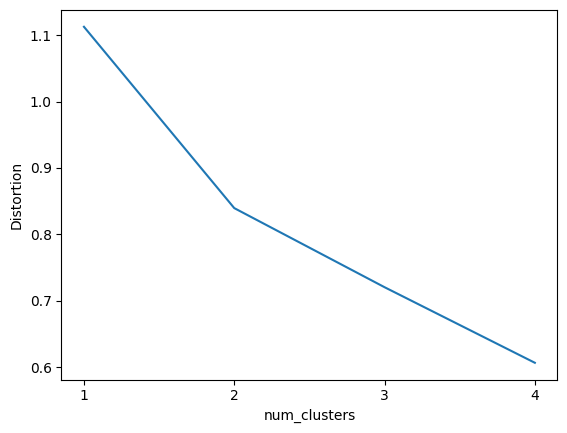

In [8]:
distortions = [] # the list of disortion between every cluster center
num_clusters = range(1,5) # a range of numbers

for i in num_clusters:
  cluster_center, distortion = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], i)
  distortions.append(distortion) # addes the distortions distance from difference cluster numbers possiblities

elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'Distortion': distortions}) # create an elbow plot dataframe

#finding the most optimal number of clusters based on the distortion
sns.lineplot(x = 'num_clusters', y = 'Distortion', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Most optimal number of clusters is 2**

**Using this I can label the clusters in the graph**

Text(0.5, 1.0, 'Number of Hoops and Tennis combined with pickleball per 10k resident in the 100 popular cities in US')

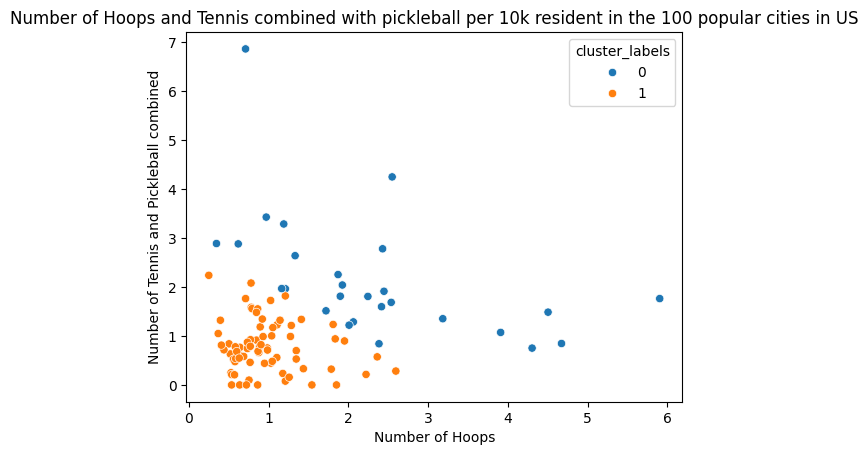

In [23]:
cluster_centers, distortions = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], 2) #Creating 2 clusters clusters

df_features['cluster_labels'], distortions = vq(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], cluster_centers) #Labeling the clusters

sns.scatterplot(x = 'Hoops_scaled', y = 'Pickleball_combined_scaled',
                hue = df_features['cluster_labels'],
                data = df_features[['Hoops_scaled', 'Pickleball_combined_scaled']]) #Creating a scatterplot of the clusters
plt.xlabel('Number of Hoops')
plt.ylabel('Number of Tennis and Pickleball combined')
plt.title('Number of Hoops and Tennis combined with pickleball per 10k resident in the 100 popular cities in US') #Editing the plot